<a href="https://colab.research.google.com/github/akankshakusf/LangGraph/blob/master/Langraph_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!pip install langgraph langsmith

In [17]:
!pip install langchain langchain_groq langchain_community

In [18]:
#let import all the keys
from google.colab import userdata

groq_api_key=userdata.get("GROQ_API_KEY")
langsmith=userdata.get("LANGSMITH_API_KEY")

In [19]:
#initialize environment variables
import os
os.environ["LANGSMITH_API_KEY"]=langsmith
os.environ["LANGCHAIN_TRACKING_V2"]="true"
os.environ["LANGSMITH_PROJECT"]="HandsOnLangraph"

In [20]:
#import the llm model
from langchain_groq import ChatGroq

In [21]:
#instantiate the model
llm=ChatGroq(model_name="gemma2-9b-it", groq_api_key=groq_api_key)
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7820f0e78350>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7820f0e70290>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Start Building ChatBot with Langraph

In [22]:
# Importing libraries for chatbot implementation
from typing import Annotated  # Helps in adding extra type hints for better code understanding
from typing_extensions import TypedDict  # Allows creating structured dictionaries with specific data types

# Importing tools for managing chatbot state
from langgraph.graph import StateGraph,START,END

# Importing a function to manage chat messages
from langgraph.graph.message import add_messages

In [25]:
class State(TypedDict):
  #message that have the type "list". The "add_messages" function
  # in the annotation define how this is state key should be upadated
  # in this case it appends messages to the list  rather than overwriting them
  messages:Annotated[list,add_messages]

#initialize StateGraph
graph_builder=StateGraph(State)
graph_builder

In [26]:
def chatbot(state=State):
  return {"messages":llm.invoke(state['messages'])}

# lets add the chatbot node
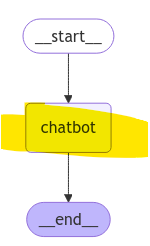

In [27]:
graph_builder.add_node("chatbot", chatbot)

In [28]:
graph_builder

# lets add the start and  end edge nodes shown in above diagram

In [31]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [59]:
graph = graph_builder.compile()

i got this piece of code from the documenatation
https://langchain-ai.github.io/langgraph/tutorials/introduction/#part-1-build-a-basic-chatbot

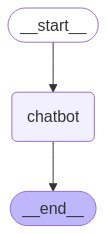

In [60]:
#You can visualize the graph using the get_graph method and one of the "draw" methods,
#like draw_ascii or draw_png. The draw methods each require additional dependencies.
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass



In [64]:
# Keep the chatbot running continuously until the user decides to quit
while True:
    # Ask the user for input (simulating a chat)
    user_input = input("User: ")

    # Check if the user wants to exit by typing "quit" or "q" (case insensitive)
    if user_input.lower() in ["quit", "q"]:
        print("Good Bye")  # Say goodbye
        break  # Exit the loop and stop the chatbot

    # Process the user's message through the chatbot's state graph
    for event in graph.stream({'messages': ("user", user_input)}):
        print(event.values())  # Print raw chatbot response data (for debugging)

        # Extract and display the chatbot’s response
        for value in event.values():
            print(value['messages'])  # Print the full list of chat messages
            print("Assistant:", value['messages'].content)


User: hello
dict_values([{'messages': AIMessage(content='Hello! 👋  How can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001952716, 'queue_time': 0.017550144, 'total_time': 0.029225443}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-8bbfd9c0-14a2-42c5-82ec-21f1392c534f-0', usage_metadata={'input_tokens': 11, 'output_tokens': 15, 'total_tokens': 26})}])
content='Hello! 👋  How can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 11, 'total_tokens': 26, 'completion_time': 0.027272727, 'prompt_time': 0.001952716, 'queue_time': 0.017550144, 'total_time': 0.029225443}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-8bbfd9c0-14a2